In [1]:
from PIL import Image
import cv2 
import numpy as np
from pathlib import Path
import os, shutil
from os import listdir
import pickle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import pickle
import pandas as pd
from pandas import Series, DataFrame

In [2]:
with open(os.path.join(r"C:\Users\g_bab\Downloads",'myDictionaryrocket.pkl'), "rb") as f:
    one_hots_dict = pickle.load(f)

In [3]:
print((one_hots_dict[len(xtest_data)]))

# for i in range(len(xtest_data)):
#     print(np.argmax(one_hots_dict[i]))

NameError: name 'xtest_data' is not defined

In [14]:
images_dir = Path(r"C:\Users\g_bab\Downloads\data_wo_rocket_body").expanduser()

xtest_data = []
labelslisttest = []
count = 0
for fname in listdir(images_dir):
    im = np.load(os.path.join(images_dir, fname))
    xtest_data.append(im)
    labelslisttest.append(one_hots_dict[count])  


In [15]:
for i in xtest_data:
    print(i.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [16]:
#base square size
M, N = 100, 100

In [17]:
im = Image.open(r"C:\Users\g_bab\Downloads\square landscape.jpg")
im = np.array(im)
rangex = range(0, im.shape[0], M)
rangey = range(0,im.shape[1],N)

tiles = [im[x:x+M,y:y+N] for x in rangex for y in rangey]


150


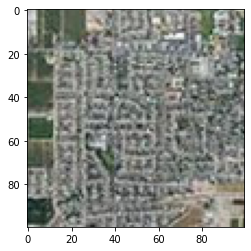

In [18]:
fig, ax = plt.subplots()
count=0 
for i in range(len(tiles)):
    ax.imshow(tiles[i])
    count+=1
print(count)

In [19]:
keypointslist = []       #will have number of classes number of keypoints
descriptorslist = []     #will have number of classes number of descriptor vectors   <-- important thing

sift = cv2.xfeatures2d.SIFT_create()

for i in tiles:
    #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)    might uncomment later

    #sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(i,None)
    
    keypointslist.append(keypoints)
    descriptorslist.append(descriptors)
    print(len(keypoints))
    

64
79
86
65
96
54
103
106
100
57
69
72
59
41
35
109
43
89
46
26
104
104
122
113
100
103
32
38
16
46
45
28
81
68
91
120
75
139
119
109
96
96
84
89
103
70
66
68
55
70
73
101
114
102
97
101
132
118
102
106
122
78
82
81
130
98
81
126
90
72
90
78
106
84
74
95
66
86
60
90
131
153
70
138
108
106
117
143
97
114
107
52
89
103
97
109
148
114
122
105
97
122
92
116
105
93
97
53
93
63
98
126
95
123
116
70
77
93
103
130
165
137
95
90
90
54
116
78
82
106
121
58
90
100
137
79
63
46
51
84
44
64
82
68
106
127
105
124
125
131


In [24]:
#test with all our distorted images and see how many guesses come back right
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
acc_count = 0
killed_imgs = 0

for i in range(len(xtest_data)):  #for each test image
    
    test_keypoints, test_descriptors = sift.detectAndCompute(xtest_data[i],None)      #calculate descriptor of that image
    matches_counts = []
    if test_descriptors is None:
        print("no descriptor")
        killed_imgs+=1
        continue
    for j in descriptorslist:                      #compare that discriptor with every descriptor of the 150 classifying images
        matches = bf.match(j,test_descriptors)    
        matches_counts.append(len(matches))        
        
    guess = np.argmax(matches_counts)              #return which classifying image most matched the test image
    
    if np.argmax(one_hots_dict[i]) == guess:      #if the guess is the same as the label, mark as correct
        acc_count+=1
        

no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor
no descriptor


In [25]:
final_accuracy = acc_count/(len(xtest_data)-killed_imgs)
print(final_accuracy)

0.004674769600641111


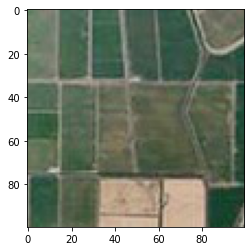

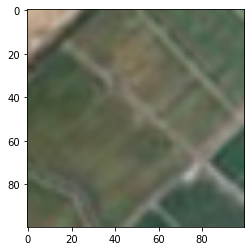

In [51]:
#use this to check that its actually looking for the right stuff
check_number = 0

test_keypoints, test_descriptors = sift.detectAndCompute(xtest_data[check_number],None)
descriptorslist[check_number]

fig, ax = plt.subplots()
ax.imshow(tiles[check_number])
fig, ax = plt.subplots()
ax.imshow(xtest_data[check_number])



In [52]:
matches = bf.match(descriptorslist[check_number],test_descriptors)

img3 = cv2.drawMatches(tiles[check_number], keypointslist[check_number], xtest_data[check_number], test_keypoints, matches, xtest_data[check_number], flags=2)


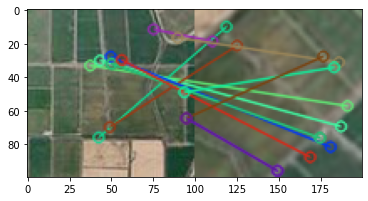

In [53]:
fig, ax = plt.subplots()
ax.imshow(img3)